In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import geopandas as gpd

gpd.__version__

'0.8.0'

In [3]:
import geoplot as gplt

gplt.__version__

'0.4.1'

## 2.1 geopandas近期重要更新

### 2.1.1 新增高性能文件格式

In [6]:
import numpy as np
from shapely.geometry import Point
import pandas as pd
from tqdm.notebook import tqdm

# 创建虚拟表，其中字段名为了导出shapefile不报错加上非数字的前缀
base = pd.DataFrame(np.column_stack([np.random.randint(1, 100, (2000000, 10)), 
                                     np.random.uniform(-90, 90, (2000000, 2))]),
                    columns=['_'+str(i) for i in range(12)])

tqdm.pandas() # 开启apply进度条
base['geometry'] = base.progress_apply(lambda row: Point(row['_10'], row['_11']), axis=1) # 添加矢量列

base = gpd.GeoDataFrame(base, crs='EPSG:4326') # 转换为GeoDataFrame

- **to_feather**

In [7]:
%%time

# 导出为shapefile
base.to_file('geopandas导出测试.shp')

Wall time: 5min 25s


In [8]:
%%time

# 导出为feather
base.to_feather('geopandas导出测试.feather')

Wall time: 50 s


- **read_feather**

In [9]:
%%time

# 读入之前写出的shapefile
base = gpd.read_file('geopandas导出测试.shp')

Wall time: 1min 36s


In [10]:
%%time

# 读入之前写出的feather
base = gpd.read_feather('geopandas导出测试.feather')

Wall time: 25.7 s


- **to_parquet**

In [11]:
%%time

# 导出为parquet
base.to_parquet('geopandas导出测试.parquet')

Wall time: 52.4 s


- **read_parquet**

In [12]:
%%time

# 读入之前写出的parquet
base = gpd.read_parquet('geopandas导出测试.parquet')

Wall time: 26 s


In [20]:
print(pd.DataFrame({
    '类型': ['shapefile', 'feather', 'parquet'],
    '写出耗时': ['325秒', '50秒', '52.4秒'],
    '读入耗时': ['96秒', '25.7秒', '26秒'],
    '写出文件大小': ['619MB', '128MB', '81.2MB']
}).to_markdown())

|    | 类型      | 写出耗时   | 读入耗时   | 写出文件大小   |
|---:|:----------|:-----------|:-----------|:---------------|
|  0 | shapefile | 325秒      | 96秒       | 619MB          |
|  1 | feather   | 50秒       | 25.7秒     | 128MB          |
|  2 | parquet   | 52.4秒     | 26秒       | 81.2MB         |


## 2.2 geoplot近期重要更新

### 2.2.1 webplot在线底图切换方式升级

In [14]:
import contextily as ctx

ctx.providers.keys()

dict_keys(['OpenStreetMap', 'OpenSeaMap', 'OpenPtMap', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Thunderforest', 'OpenMapSurfer', 'Hydda', 'MapBox', 'Stamen', 'Esri', 'OpenWeatherMap', 'HERE', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'Wikimedia', 'GeoportailFrance', 'OneMapSG'])

In [15]:
ctx.providers['Esri']

{'WorldStreetMap': {'url': 'https://server.arcgisonline.com/ArcGIS/rest/services/{variant}/MapServer/tile/{z}/{y}/{x}',
  'variant': 'World_Street_Map',
  'attribution': 'Tiles (C) Esri -- Source: Esri, DeLorme, NAVTEQ, USGS, Intermap, iPC, NRCAN, Esri Japan, METI, Esri China (Hong Kong), Esri (Thailand), TomTom, 2012',
  'name': 'Esri.WorldStreetMap'},
 'DeLorme': {'url': 'https://server.arcgisonline.com/ArcGIS/rest/services/{variant}/MapServer/tile/{z}/{y}/{x}',
  'variant': 'Specialty/DeLorme_World_Base_Map',
  'attribution': 'Tiles (C) Esri -- Copyright: (C)2012 DeLorme',
  'min_zoom': 1,
  'max_zoom': 11,
  'name': 'Esri.DeLorme'},
 'WorldTopoMap': {'url': 'https://server.arcgisonline.com/ArcGIS/rest/services/{variant}/MapServer/tile/{z}/{y}/{x}',
  'variant': 'World_Topo_Map',
  'attribution': 'Tiles (C) Esri -- Esri, DeLorme, NAVTEQ, TomTom, Intermap, iPC, USGS, FAO, NPS, NRCAN, GeoBase, Kadaster NL, Ordnance Survey, Esri Japan, METI, Esri China (Hong Kong), and the GIS User Com

In [16]:
ctx.providers['Esri']['WorldTopoMap']

{'url': 'https://server.arcgisonline.com/ArcGIS/rest/services/{variant}/MapServer/tile/{z}/{y}/{x}',
 'variant': 'World_Topo_Map',
 'attribution': 'Tiles (C) Esri -- Esri, DeLorme, NAVTEQ, TomTom, Intermap, iPC, USGS, FAO, NPS, NRCAN, GeoBase, Kadaster NL, Ordnance Survey, Esri Japan, METI, Esri China (Hong Kong), and the GIS User Community',
 'name': 'Esri.WorldTopoMap'}

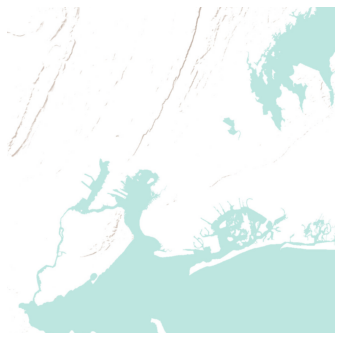

In [17]:
boroughs = gpd.read_file('nyc-boroughs.geojson')
gplt.webmap(boroughs, provider=ctx.providers['Esri']['WorldTerrain'])

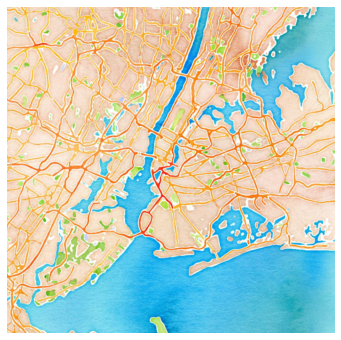

In [18]:
gplt.webmap(boroughs, provider={'url': 'http://{s}.tile.stamen.com/watercolor/{z}/{x}/{y}.jpg', 'attribution': 'test'})

In [ ]:
{
    'url': 'https://{s}.tile.thunderforest.com/spinal-map/{z}/{x}/{y}.png?apikey=41f4f936f1d148f69cbd100812875c88', 
    'attribution': 'test'
}

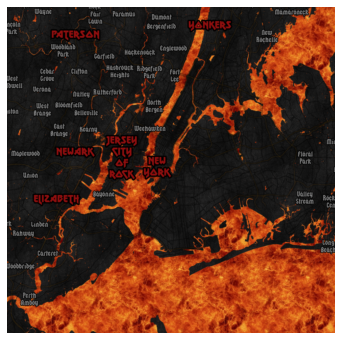

In [19]:
gplt.webmap(boroughs, provider={'url': 'https://{s}.tile.thunderforest.com/spinal-map/{z}/{x}/{y}.png?apikey=41f4f936f1d148f69cbd100812875c88', 
                                'attribution': 'test'})